In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.svm import SVC
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [3]:
peripartum_df = pd.read_csv("../Dataset/peripartum_processed.csv")

In [4]:
x = peripartum_df.drop(['RiskLevel'], axis=1)
y = peripartum_df['RiskLevel']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5, stratify=y)

### Deafult model configuration

In [5]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       102
           1       0.76      0.82      0.79        84
           2       0.86      0.87      0.86        68

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



In [6]:
model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85       102
           1       0.77      0.81      0.79        84
           2       0.86      0.87      0.86        68

    accuracy                           0.83       254
   macro avg       0.83      0.84      0.84       254
weighted avg       0.84      0.83      0.84       254



In [7]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       102
           1       0.73      0.85      0.78        84
           2       0.85      0.84      0.84        68

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.84      0.83      0.83       254



In [9]:
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       102
           1       0.47      0.27      0.35        84
           2       0.85      0.59      0.70        68

    accuracy                           0.60       254
   macro avg       0.63      0.58      0.58       254
weighted avg       0.61      0.60      0.58       254



### Parameter tuning and cross validation

In [5]:
features = peripartum_df.drop(['RiskLevel'], axis=1)
target = peripartum_df['RiskLevel']

Accuracy:
0.9411764705882353
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.95      0.86      0.90        22
           2       0.90      0.95      0.92        19

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

Confusion matrix:


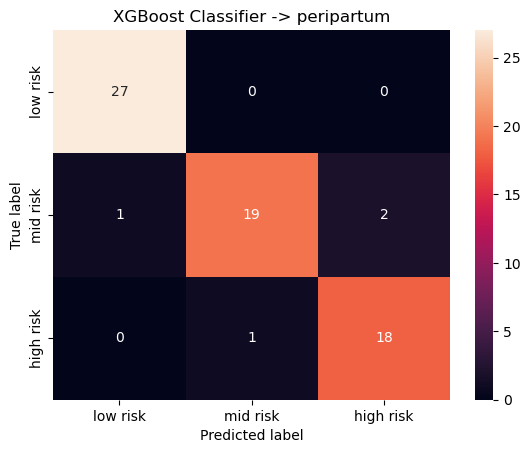

Accuracy:
0.7794117647058824
              precision    recall  f1-score   support

           0       0.73      0.89      0.80        27
           1       0.71      0.55      0.62        22
           2       0.94      0.89      0.92        19

    accuracy                           0.78        68
   macro avg       0.79      0.78      0.78        68
weighted avg       0.78      0.78      0.77        68

Confusion matrix:


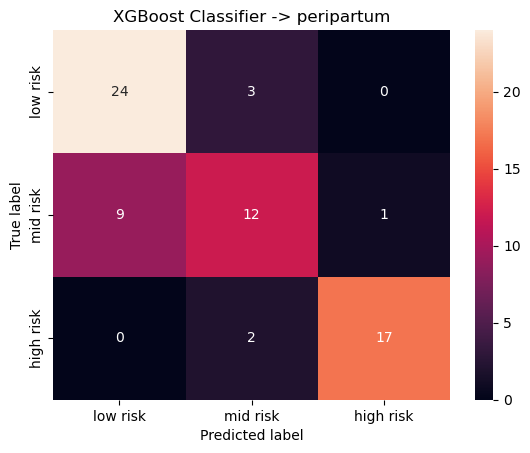

Accuracy:
0.9705882352941176
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        28
           1       0.96      1.00      0.98        22
           2       1.00      0.94      0.97        18

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

Confusion matrix:


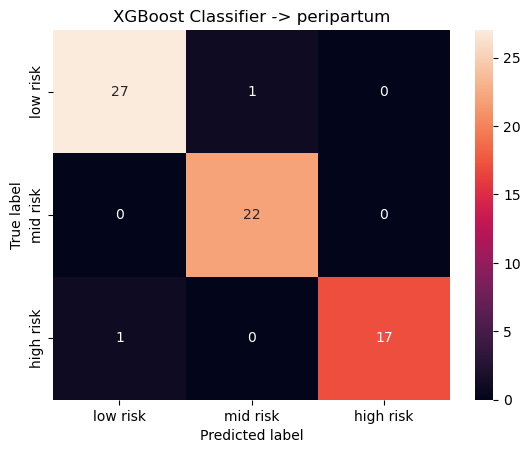

Accuracy:
0.8088235294117647
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        27
           1       0.70      0.83      0.76        23
           2       0.89      0.89      0.89        18

    accuracy                           0.81        68
   macro avg       0.82      0.82      0.82        68
weighted avg       0.82      0.81      0.81        68

Confusion matrix:


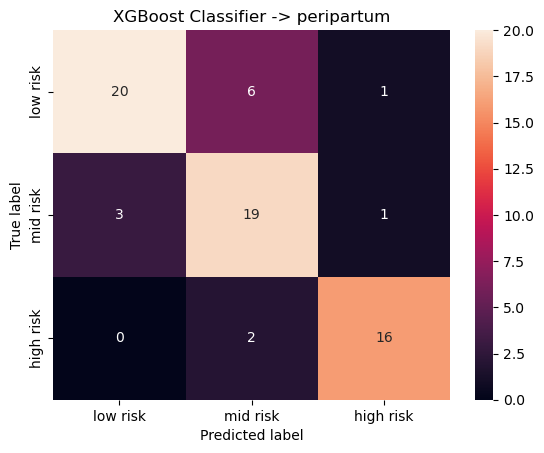

Accuracy:
0.6470588235294118
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        27
           1       0.48      0.48      0.48        23
           2       0.94      0.94      0.94        18

    accuracy                           0.65        68
   macro avg       0.67      0.67      0.67        68
weighted avg       0.65      0.65      0.65        68

Confusion matrix:


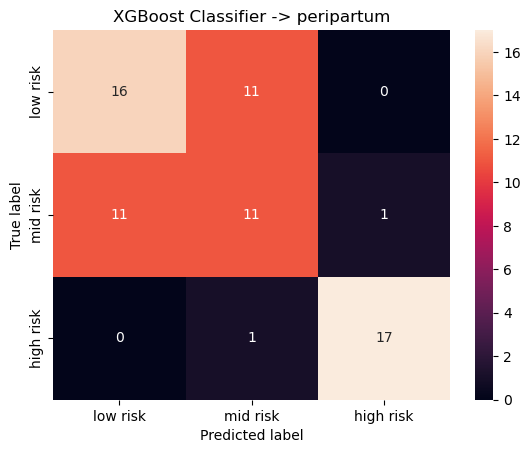

Accuracy:
0.4117647058823529
              precision    recall  f1-score   support

           0       0.33      0.19      0.24        27
           1       0.29      0.43      0.34        23
           2       0.72      0.72      0.72        18

    accuracy                           0.41        68
   macro avg       0.45      0.45      0.44        68
weighted avg       0.42      0.41      0.40        68

Confusion matrix:


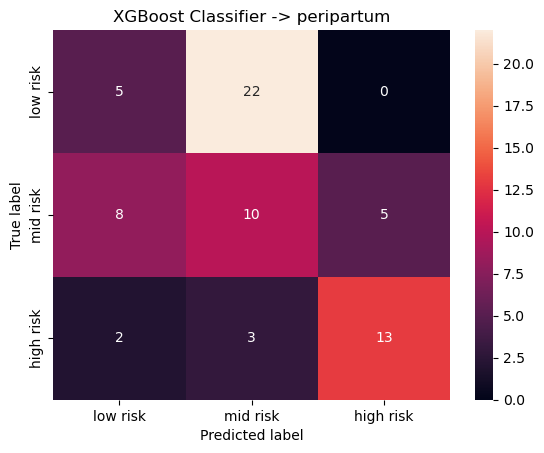

Accuracy:
0.45588235294117646
              precision    recall  f1-score   support

           0       0.46      0.41      0.43        27
           1       0.30      0.39      0.34        23
           2       0.79      0.61      0.69        18

    accuracy                           0.46        68
   macro avg       0.51      0.47      0.49        68
weighted avg       0.49      0.46      0.47        68

Confusion matrix:


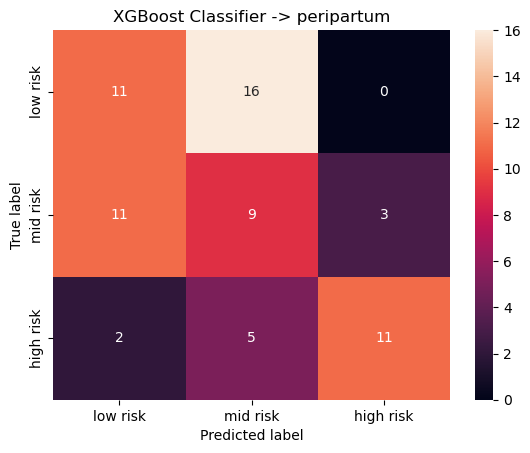

Accuracy:
0.7205882352941176
              precision    recall  f1-score   support

           0       0.83      0.56      0.67        27
           1       0.60      0.78      0.68        23
           2       0.80      0.89      0.84        18

    accuracy                           0.72        68
   macro avg       0.74      0.74      0.73        68
weighted avg       0.75      0.72      0.72        68

Confusion matrix:


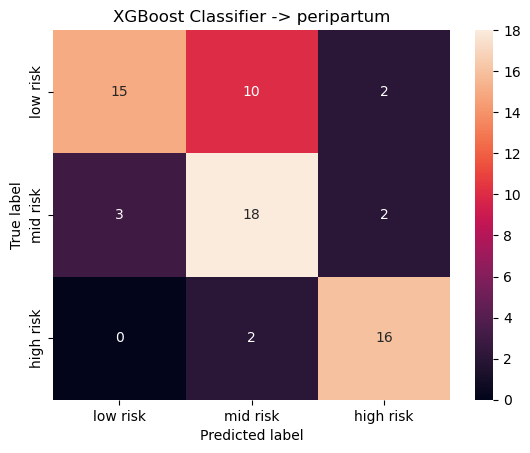

Accuracy:
0.9117647058823529
              precision    recall  f1-score   support

           0       1.00      0.85      0.92        27
           1       0.85      0.96      0.90        23
           2       0.89      0.94      0.92        18

    accuracy                           0.91        68
   macro avg       0.91      0.92      0.91        68
weighted avg       0.92      0.91      0.91        68

Confusion matrix:


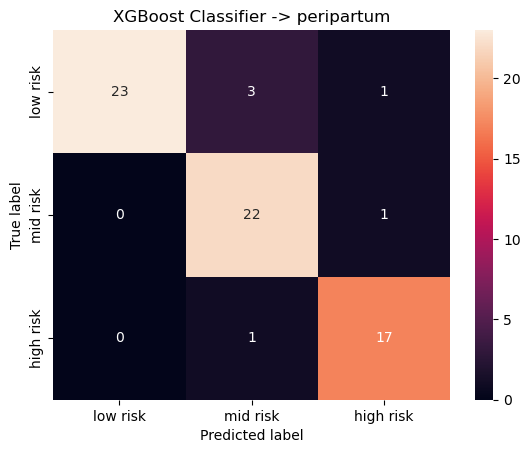

Accuracy:
0.9253731343283582
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        27
           1       0.91      0.91      0.91        22
           2       1.00      0.89      0.94        18

    accuracy                           0.93        67
   macro avg       0.94      0.92      0.93        67
weighted avg       0.93      0.93      0.93        67

Confusion matrix:


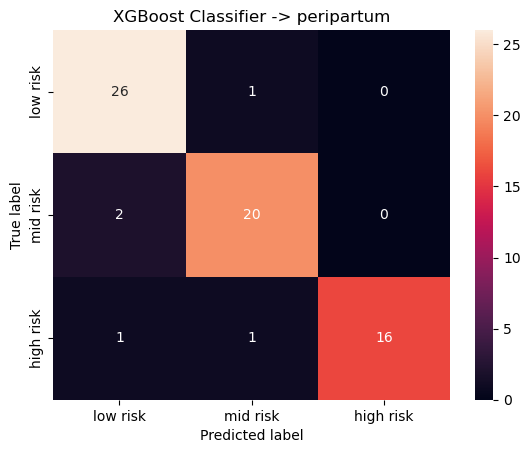

Accuracy:
0.7910447761194029
              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       0.75      0.68      0.71        22
           2       0.88      0.83      0.86        18

    accuracy                           0.79        67
   macro avg       0.80      0.79      0.79        67
weighted avg       0.79      0.79      0.79        67

Confusion matrix:


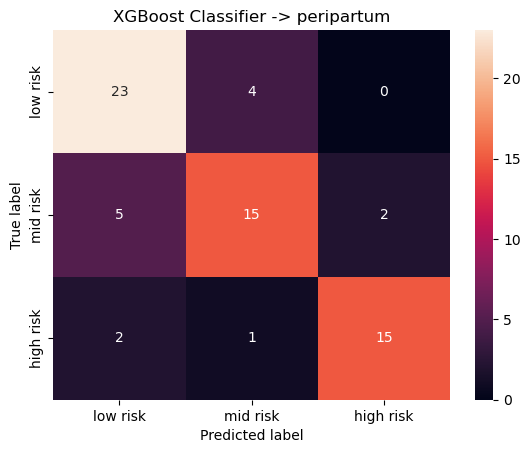

Accuracy:
0.6268656716417911
              precision    recall  f1-score   support

           0       0.64      0.52      0.57        27
           1       0.48      0.55      0.51        22
           2       0.80      0.89      0.84        18

    accuracy                           0.63        67
   macro avg       0.64      0.65      0.64        67
weighted avg       0.63      0.63      0.62        67

Confusion matrix:


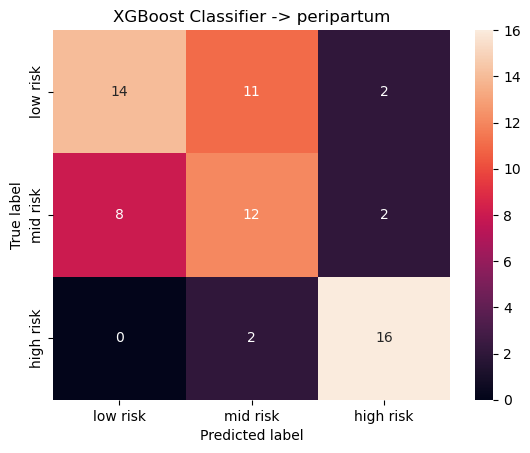

Accuracy:
0.5970149253731343
              precision    recall  f1-score   support

           0       0.58      0.67      0.62        27
           1       0.40      0.27      0.32        22
           2       0.76      0.89      0.82        18

    accuracy                           0.60        67
   macro avg       0.58      0.61      0.59        67
weighted avg       0.57      0.60      0.58        67

Confusion matrix:


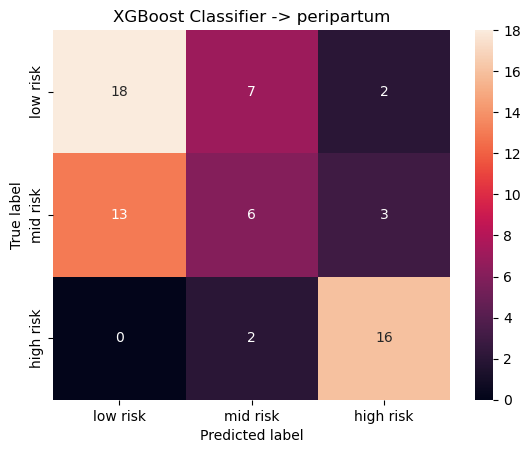

Accuracy:
0.7910447761194029
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.68      0.68      0.68        22
           2       0.83      0.83      0.83        18

    accuracy                           0.79        67
   macro avg       0.79      0.79      0.79        67
weighted avg       0.79      0.79      0.79        67

Confusion matrix:


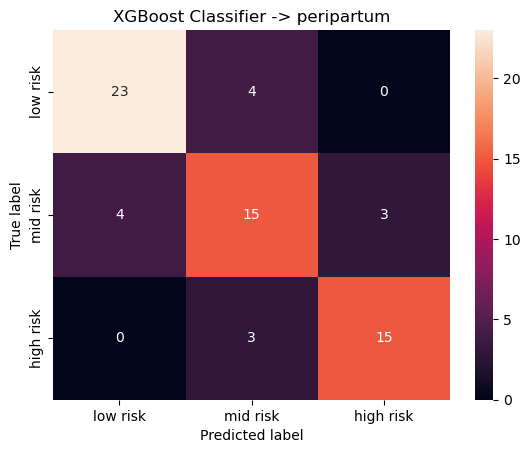

Accuracy:
0.9253731343283582
              precision    recall  f1-score   support

           0       0.93      0.96      0.95        27
           1       0.91      0.95      0.93        22
           2       0.94      0.83      0.88        18

    accuracy                           0.93        67
   macro avg       0.93      0.92      0.92        67
weighted avg       0.93      0.93      0.92        67

Confusion matrix:


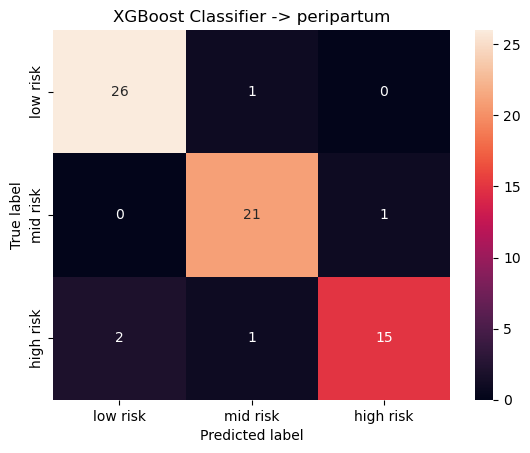

In [6]:
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(features, target)


for train_index, val_index in skf.split(features, target.astype("category")):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = XGBClassifier(n_estimators=100, max_depth=7, eta=0.1, subsample=0.3, colsample_bytree=0.4,objective="multi:softmax",verbosity=0, use_label_encoder=False)
    model.fit(X_train_scaled, y_train)
    y_val_hat = model.predict(X_val_scaled)
    y_prob = model.predict_proba(X_val_scaled)
    print("Accuracy:")
    print(metrics.accuracy_score(tf.keras.utils.to_categorical(y_val),tf.keras.utils.to_categorical(np.argmax(y_prob,axis=1))))
    print(metrics.classification_report(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)))
    print("Confusion matrix:")
    sns.heatmap(metrics.confusion_matrix(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)), annot=True, xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("XGBoost Classifier -> peripartum")
    plt.show()

Accuracy:
0.9411764705882353
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.95      0.86      0.90        22
           2       0.95      0.95      0.95        19

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68

Confusion matrix:


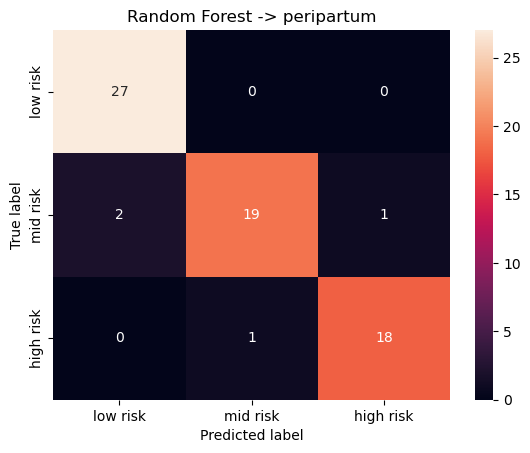

Accuracy:
0.7647058823529411
              precision    recall  f1-score   support

           0       0.68      0.93      0.78        27
           1       0.75      0.41      0.53        22
           2       0.95      0.95      0.95        19

    accuracy                           0.76        68
   macro avg       0.79      0.76      0.75        68
weighted avg       0.78      0.76      0.75        68

Confusion matrix:


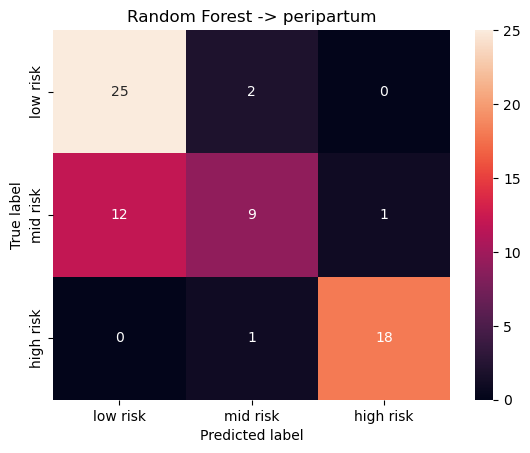

Accuracy:
0.9264705882352942
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.91      0.91      0.91        22
           2       1.00      0.94      0.97        18

    accuracy                           0.93        68
   macro avg       0.94      0.93      0.93        68
weighted avg       0.93      0.93      0.93        68

Confusion matrix:


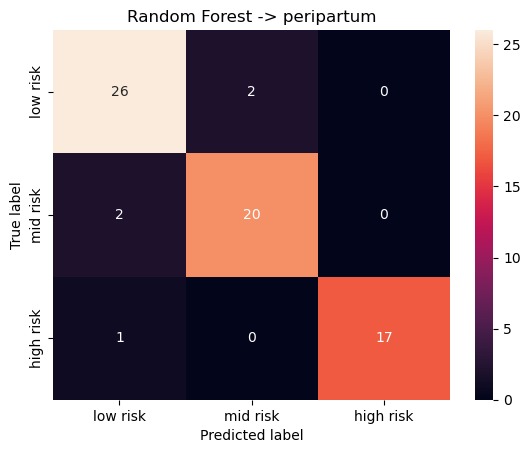

Accuracy:
0.7058823529411765
              precision    recall  f1-score   support

           0       0.67      0.81      0.73        27
           1       0.58      0.48      0.52        23
           2       0.94      0.83      0.88        18

    accuracy                           0.71        68
   macro avg       0.73      0.71      0.71        68
weighted avg       0.71      0.71      0.70        68

Confusion matrix:


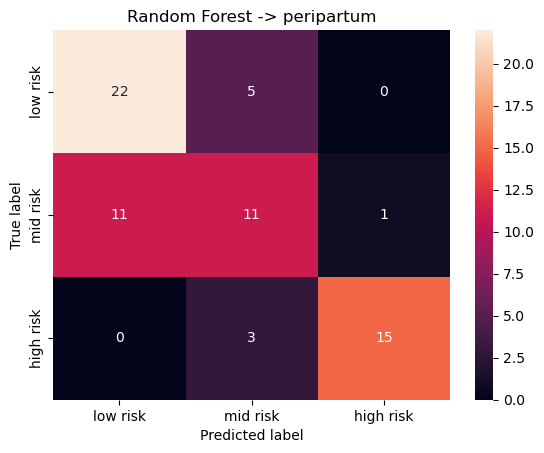

Accuracy:
0.7205882352941176
              precision    recall  f1-score   support

           0       0.62      0.89      0.73        27
           1       0.67      0.35      0.46        23
           2       1.00      0.94      0.97        18

    accuracy                           0.72        68
   macro avg       0.76      0.73      0.72        68
weighted avg       0.73      0.72      0.70        68

Confusion matrix:


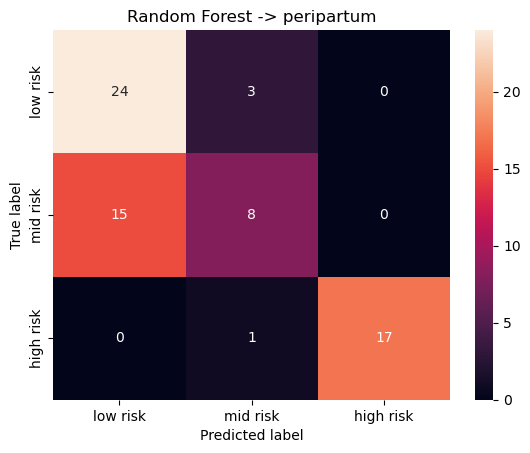

Accuracy:
0.5
              precision    recall  f1-score   support

           0       0.52      0.44      0.48        27
           1       0.33      0.39      0.36        23
           2       0.72      0.72      0.72        18

    accuracy                           0.50        68
   macro avg       0.53      0.52      0.52        68
weighted avg       0.51      0.50      0.50        68

Confusion matrix:


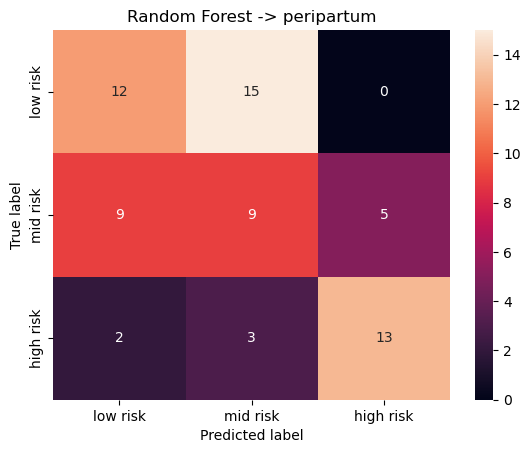

Accuracy:
0.6911764705882353
              precision    recall  f1-score   support

           0       0.58      0.93      0.71        27
           1       0.82      0.39      0.53        23
           2       0.93      0.72      0.81        18

    accuracy                           0.69        68
   macro avg       0.78      0.68      0.69        68
weighted avg       0.75      0.69      0.68        68

Confusion matrix:


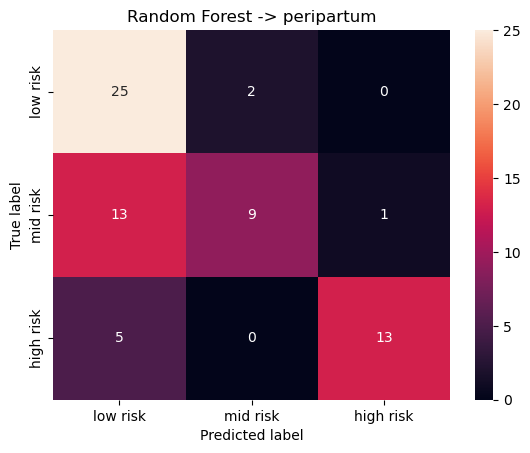

Accuracy:
0.75
              precision    recall  f1-score   support

           0       0.82      0.52      0.64        27
           1       0.63      0.83      0.72        23
           2       0.86      1.00      0.92        18

    accuracy                           0.75        68
   macro avg       0.77      0.78      0.76        68
weighted avg       0.77      0.75      0.74        68

Confusion matrix:


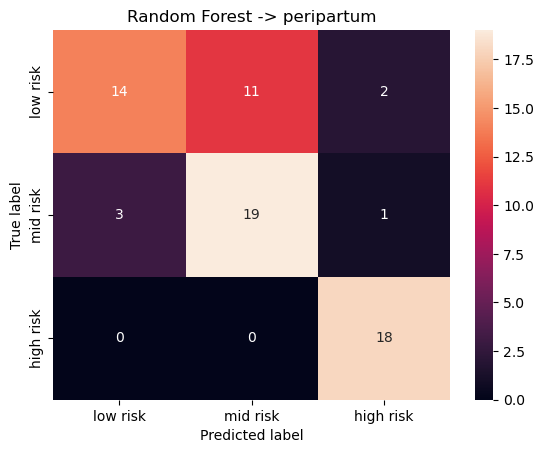

Accuracy:
0.8676470588235294
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.82      0.78      0.80        23
           2       0.94      0.94      0.94        18

    accuracy                           0.87        68
   macro avg       0.87      0.87      0.87        68
weighted avg       0.87      0.87      0.87        68

Confusion matrix:


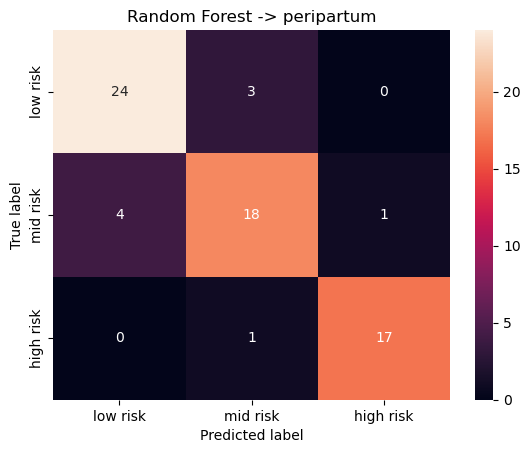

Accuracy:
0.8059701492537313
              precision    recall  f1-score   support

           0       0.70      0.96      0.81        27
           1       0.86      0.55      0.67        22
           2       1.00      0.89      0.94        18

    accuracy                           0.81        67
   macro avg       0.85      0.80      0.81        67
weighted avg       0.83      0.81      0.80        67

Confusion matrix:


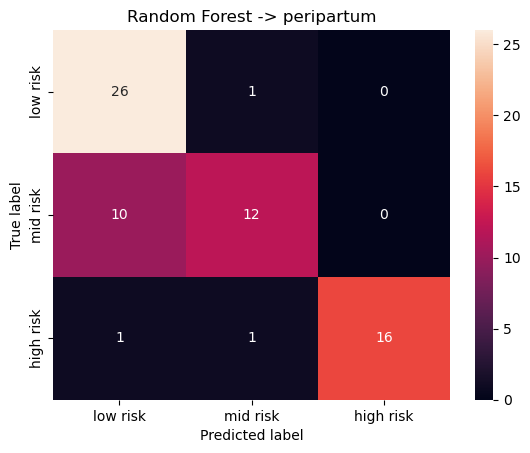

Accuracy:
0.6567164179104478
              precision    recall  f1-score   support

           0       0.56      0.81      0.67        27
           1       0.58      0.32      0.41        22
           2       0.94      0.83      0.88        18

    accuracy                           0.66        67
   macro avg       0.69      0.66      0.65        67
weighted avg       0.67      0.66      0.64        67

Confusion matrix:


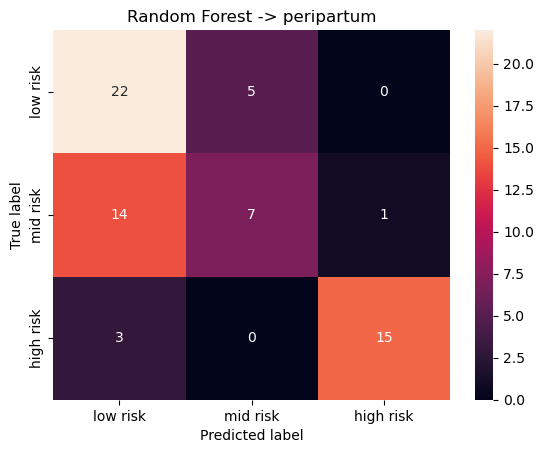

Accuracy:
0.5970149253731343
              precision    recall  f1-score   support

           0       0.58      0.52      0.55        27
           1       0.40      0.45      0.43        22
           2       0.89      0.89      0.89        18

    accuracy                           0.60        67
   macro avg       0.62      0.62      0.62        67
weighted avg       0.61      0.60      0.60        67

Confusion matrix:


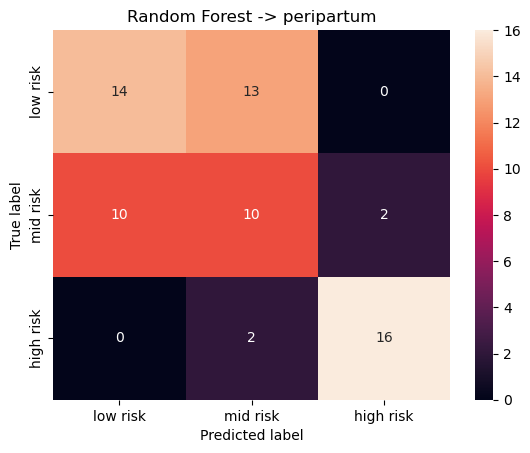

Accuracy:
0.6119402985074627
              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.43      0.27      0.33        22
           2       0.76      0.89      0.82        18

    accuracy                           0.61        67
   macro avg       0.59      0.62      0.60        67
weighted avg       0.58      0.61      0.59        67

Confusion matrix:


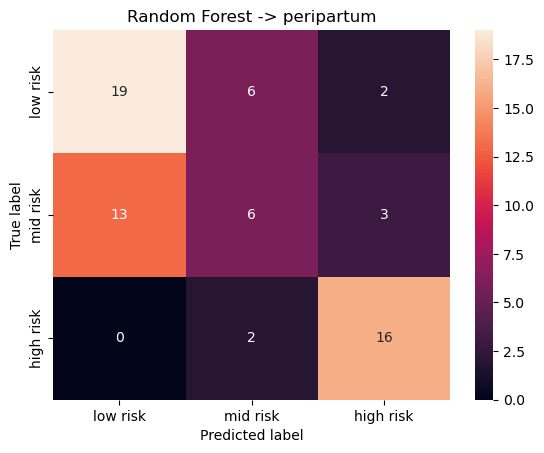

Accuracy:
0.7761194029850746
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        27
           1       0.67      0.64      0.65        22
           2       0.89      0.89      0.89        18

    accuracy                           0.78        67
   macro avg       0.78      0.78      0.78        67
weighted avg       0.77      0.78      0.78        67

Confusion matrix:


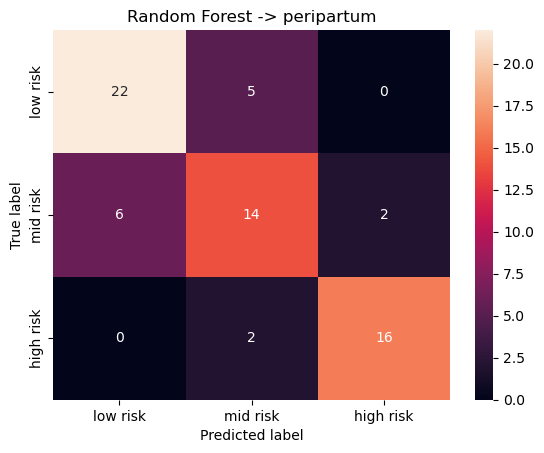

Accuracy:
0.8805970149253731
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        27
           1       0.86      0.82      0.84        22
           2       0.94      0.83      0.88        18

    accuracy                           0.88        67
   macro avg       0.89      0.87      0.88        67
weighted avg       0.88      0.88      0.88        67

Confusion matrix:


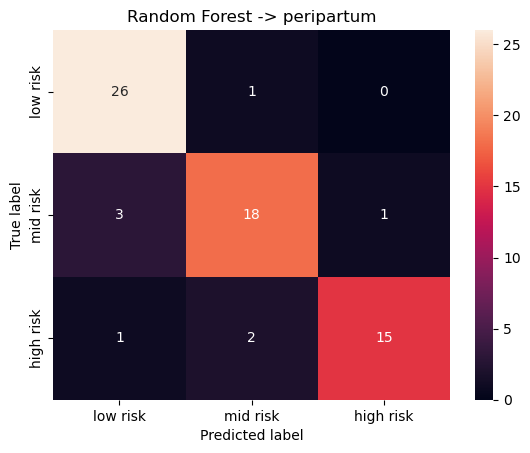

In [9]:
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(features, target)


for train_index, val_index in skf.split(features, target.astype("category")):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = RandomForestClassifier(n_estimators=100, max_depth=7)
    model.fit(X_train_scaled, y_train)
    y_val_hat = model.predict(X_val_scaled)
    y_prob = model.predict_proba(X_val_scaled)
    print("Accuracy:")
    print(metrics.accuracy_score(tf.keras.utils.to_categorical(y_val),tf.keras.utils.to_categorical(np.argmax(y_prob,axis=1))))
    print(metrics.classification_report(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)))
    print("Confusion matrix:")
    sns.heatmap(metrics.confusion_matrix(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)), annot=True, xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Random Forest -> peripartum")
    plt.show()

Accuracy:
0.8088235294117647
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        27
           1       0.85      0.50      0.63        22
           2       0.82      0.95      0.88        19

    accuracy                           0.81        68
   macro avg       0.82      0.80      0.79        68
weighted avg       0.82      0.81      0.79        68

Confusion matrix:


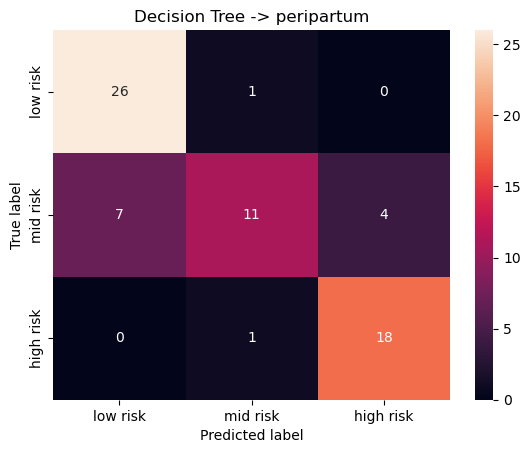

Accuracy:
0.6617647058823529
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        27
           1       0.50      0.09      0.15        22
           2       1.00      0.84      0.91        19

    accuracy                           0.66        68
   macro avg       0.69      0.64      0.60        68
weighted avg       0.66      0.66      0.59        68

Confusion matrix:


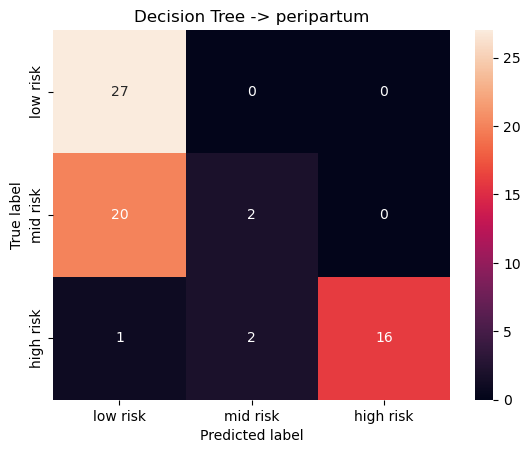

Accuracy:
0.7941176470588235
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        28
           1       0.78      0.64      0.70        22
           2       1.00      0.78      0.88        18

    accuracy                           0.79        68
   macro avg       0.83      0.78      0.80        68
weighted avg       0.81      0.79      0.79        68

Confusion matrix:


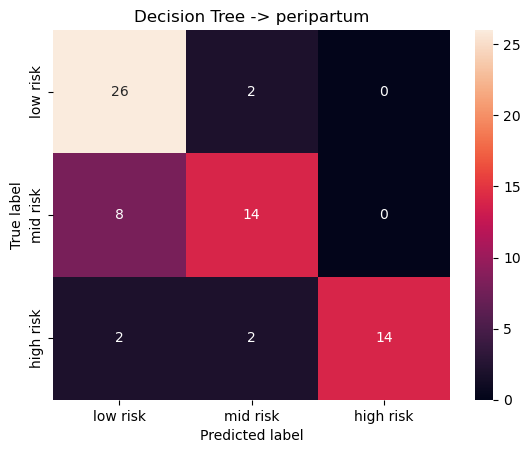

Accuracy:
0.6470588235294118
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        27
           1       0.50      0.22      0.30        23
           2       1.00      0.67      0.80        18

    accuracy                           0.65        68
   macro avg       0.70      0.63      0.61        68
weighted avg       0.67      0.65      0.61        68

Confusion matrix:


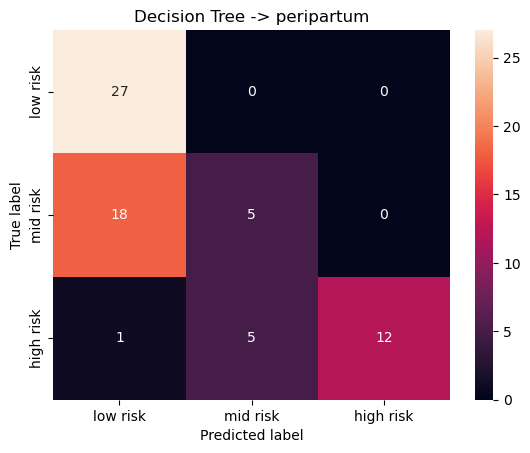

Accuracy:
0.6617647058823529
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        27
           1       0.60      0.13      0.21        23
           2       0.88      0.83      0.86        18

    accuracy                           0.66        68
   macro avg       0.69      0.65      0.60        68
weighted avg       0.67      0.66      0.59        68

Confusion matrix:


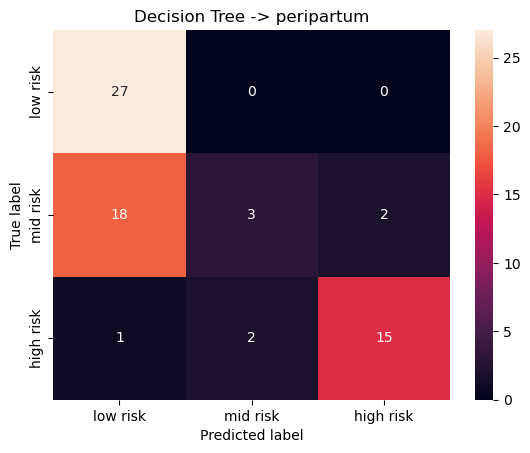

Accuracy:
0.5294117647058824
              precision    recall  f1-score   support

           0       0.58      0.81      0.68        27
           1       0.36      0.35      0.36        23
           2       0.75      0.33      0.46        18

    accuracy                           0.53        68
   macro avg       0.56      0.50      0.50        68
weighted avg       0.55      0.53      0.51        68

Confusion matrix:


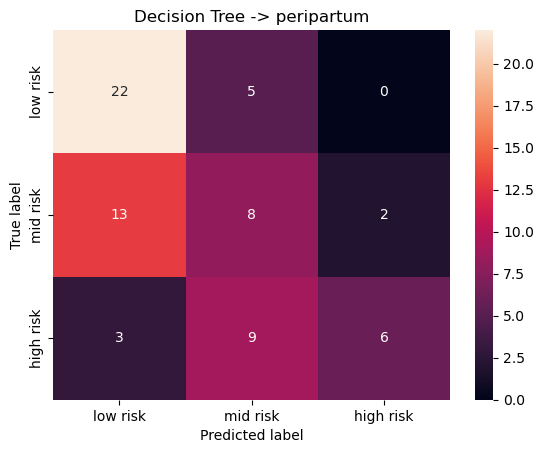

Accuracy:
0.6470588235294118
              precision    recall  f1-score   support

           0       0.56      1.00      0.72        27
           1       0.88      0.30      0.45        23
           2       0.83      0.56      0.67        18

    accuracy                           0.65        68
   macro avg       0.76      0.62      0.61        68
weighted avg       0.74      0.65      0.62        68

Confusion matrix:


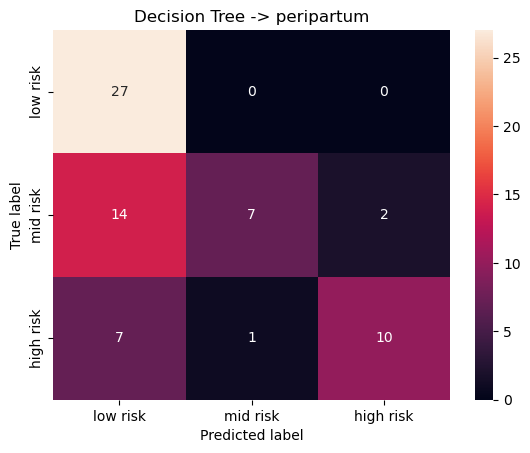

Accuracy:
0.7647058823529411
              precision    recall  f1-score   support

           0       0.67      0.89      0.76        27
           1       0.91      0.43      0.59        23
           2       0.86      1.00      0.92        18

    accuracy                           0.76        68
   macro avg       0.81      0.77      0.76        68
weighted avg       0.80      0.76      0.75        68

Confusion matrix:


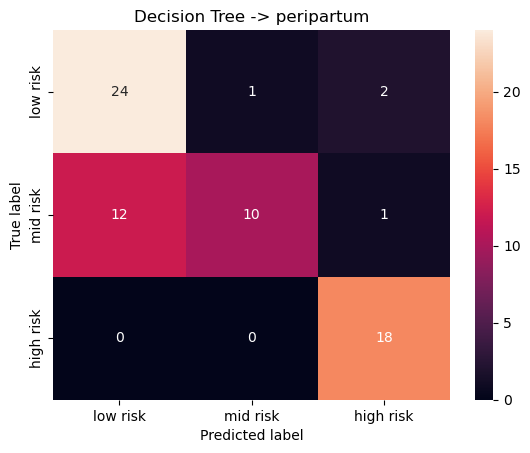

Accuracy:
0.7647058823529411
              precision    recall  f1-score   support

           0       0.69      0.93      0.79        27
           1       0.73      0.48      0.58        23
           2       0.94      0.89      0.91        18

    accuracy                           0.76        68
   macro avg       0.79      0.76      0.76        68
weighted avg       0.77      0.76      0.75        68

Confusion matrix:


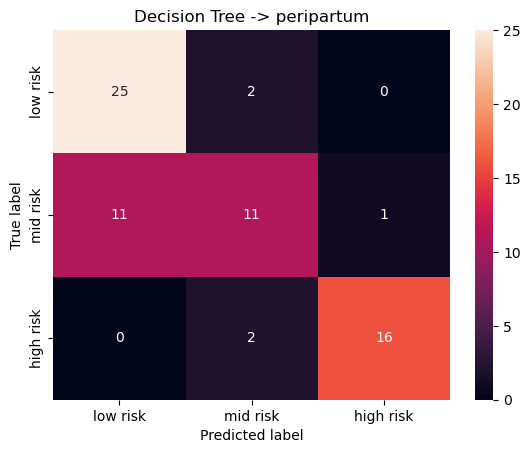

Accuracy:
0.7164179104477612
              precision    recall  f1-score   support

           0       0.66      0.93      0.77        27
           1       0.62      0.45      0.53        22
           2       1.00      0.72      0.84        18

    accuracy                           0.72        67
   macro avg       0.76      0.70      0.71        67
weighted avg       0.74      0.72      0.71        67

Confusion matrix:


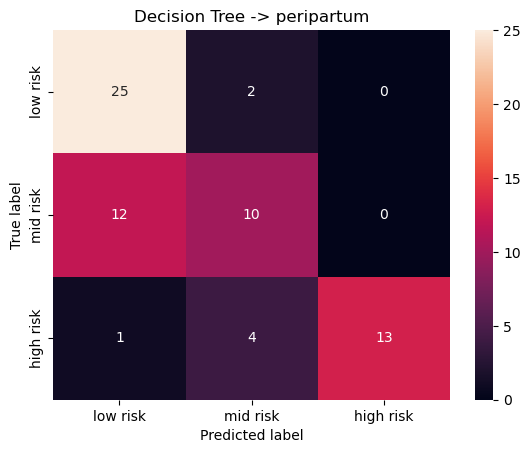

Accuracy:
0.6268656716417911
              precision    recall  f1-score   support

           0       0.55      0.96      0.70        27
           1       0.50      0.09      0.15        22
           2       0.88      0.78      0.82        18

    accuracy                           0.63        67
   macro avg       0.64      0.61      0.56        67
weighted avg       0.62      0.63      0.55        67

Confusion matrix:


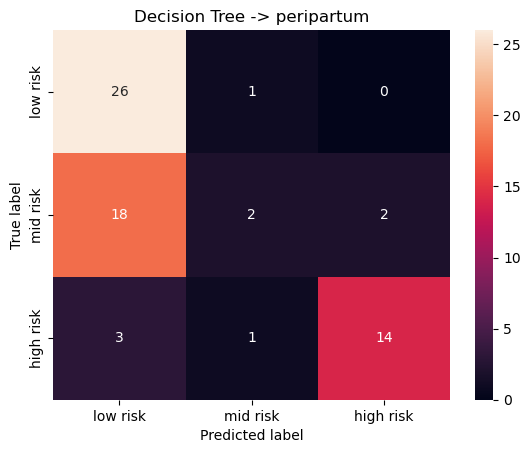

Accuracy:
0.5970149253731343
              precision    recall  f1-score   support

           0       0.56      0.67      0.61        27
           1       0.37      0.32      0.34        22
           2       0.94      0.83      0.88        18

    accuracy                           0.60        67
   macro avg       0.62      0.61      0.61        67
weighted avg       0.60      0.60      0.60        67

Confusion matrix:


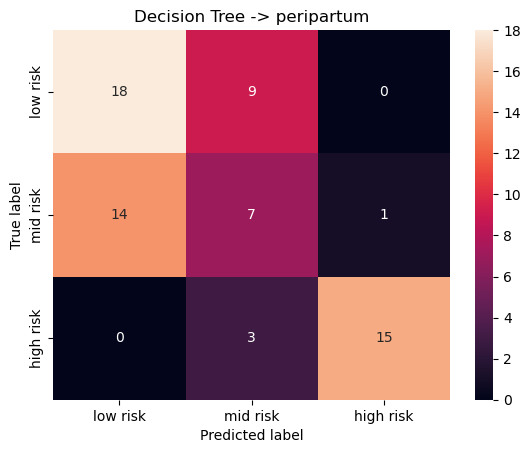

Accuracy:
0.5970149253731343
              precision    recall  f1-score   support

           0       0.57      0.85      0.69        27
           1       0.42      0.23      0.29        22
           2       0.80      0.67      0.73        18

    accuracy                           0.60        67
   macro avg       0.60      0.58      0.57        67
weighted avg       0.58      0.60      0.57        67

Confusion matrix:


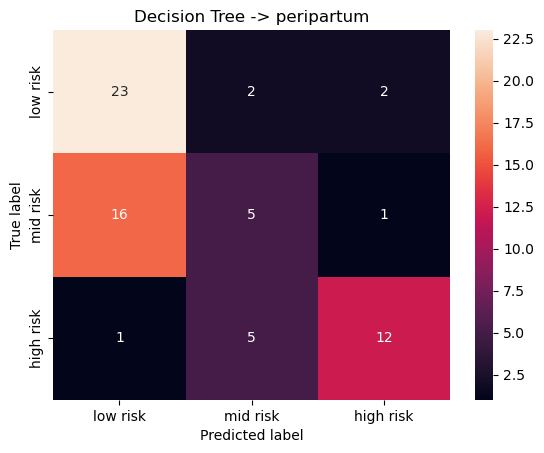

Accuracy:
0.7014925373134329
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.60      0.41      0.49        22
           2       0.88      0.83      0.86        18

    accuracy                           0.70        67
   macro avg       0.71      0.70      0.70        67
weighted avg       0.70      0.70      0.69        67

Confusion matrix:


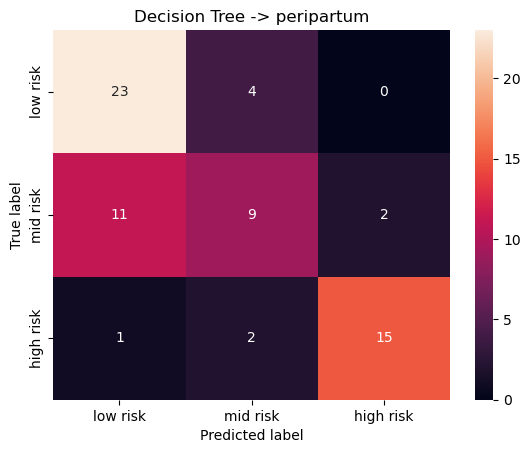

Accuracy:
0.746268656716418
              precision    recall  f1-score   support

           0       0.71      0.93      0.81        27
           1       0.70      0.64      0.67        22
           2       0.92      0.61      0.73        18

    accuracy                           0.75        67
   macro avg       0.78      0.72      0.74        67
weighted avg       0.76      0.75      0.74        67

Confusion matrix:


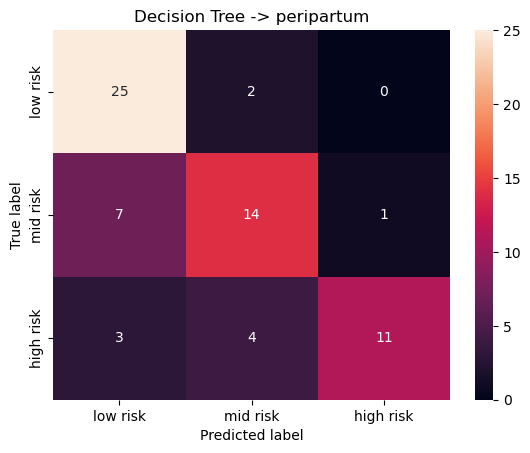

In [10]:
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(features, target)


for train_index, val_index in skf.split(features, target.astype("category")):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    model = DecisionTreeClassifier(max_depth=5)
    model.fit(X_train_scaled, y_train)
    y_val_hat = model.predict(X_val_scaled)
    y_prob = model.predict_proba(X_val_scaled)
    print("Accuracy:")
    print(metrics.accuracy_score(tf.keras.utils.to_categorical(y_val),tf.keras.utils.to_categorical(np.argmax(y_prob,axis=1))))
    print(metrics.classification_report(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)))
    print("Confusion matrix:")
    sns.heatmap(metrics.confusion_matrix(np.asarray(y_val, dtype=int),np.argmax(y_prob,axis=1)), annot=True, xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Decision Tree -> peripartum")
    plt.show()

Accuracy:
0.8382352941176471
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        27
           1       0.82      0.64      0.72        22
           2       0.90      0.95      0.92        19

    accuracy                           0.84        68
   macro avg       0.84      0.84      0.83        68
weighted avg       0.84      0.84      0.83        68

Confusion matrix:


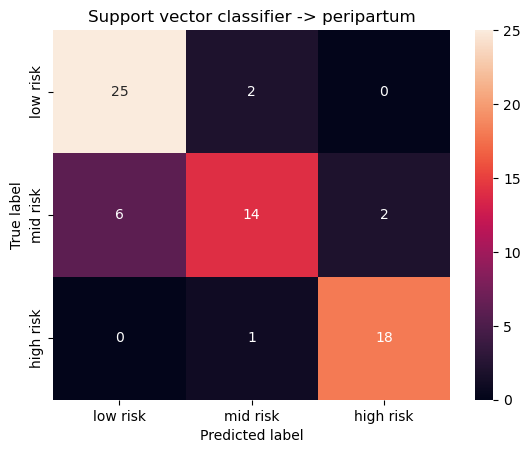

Accuracy:
0.6911764705882353
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        27
           1       0.75      0.14      0.23        22
           2       0.94      0.89      0.92        19

    accuracy                           0.69        68
   macro avg       0.76      0.68      0.63        68
weighted avg       0.74      0.69      0.63        68

Confusion matrix:


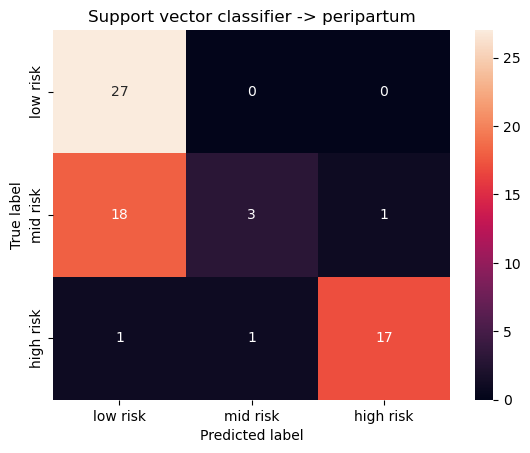

Accuracy:
0.8823529411764706
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        28
           1       1.00      0.73      0.84        22
           2       1.00      0.89      0.94        18

    accuracy                           0.88        68
   macro avg       0.93      0.87      0.89        68
weighted avg       0.91      0.88      0.88        68

Confusion matrix:


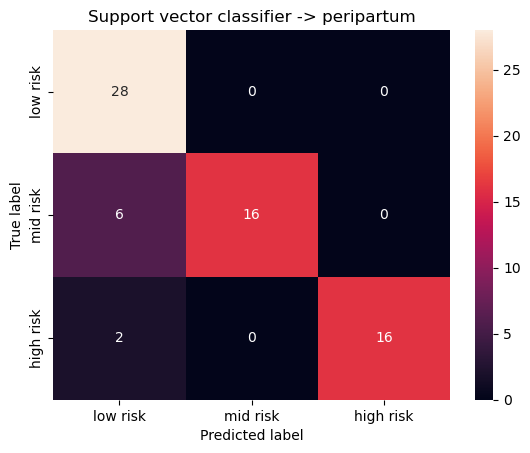

Accuracy:
0.6911764705882353
              precision    recall  f1-score   support

           0       0.63      0.96      0.76        27
           1       0.58      0.30      0.40        23
           2       0.93      0.78      0.85        18

    accuracy                           0.69        68
   macro avg       0.72      0.68      0.67        68
weighted avg       0.70      0.69      0.66        68

Confusion matrix:


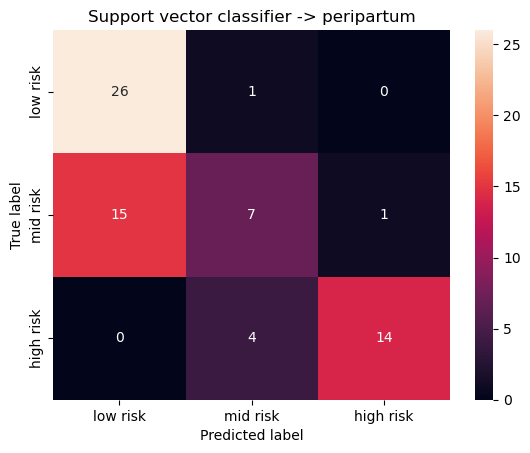

Accuracy:
0.6911764705882353
              precision    recall  f1-score   support

           0       0.60      0.96      0.74        27
           1       0.67      0.26      0.38        23
           2       0.94      0.83      0.88        18

    accuracy                           0.69        68
   macro avg       0.74      0.69      0.67        68
weighted avg       0.71      0.69      0.66        68

Confusion matrix:


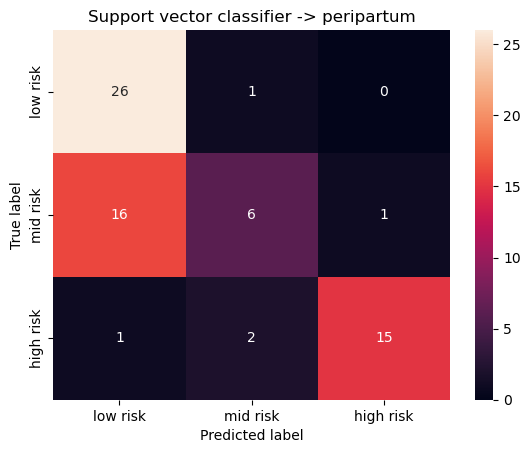

Accuracy:
0.6323529411764706
              precision    recall  f1-score   support

           0       0.66      0.78      0.71        27
           1       0.58      0.48      0.52        23
           2       0.65      0.61      0.63        18

    accuracy                           0.63        68
   macro avg       0.63      0.62      0.62        68
weighted avg       0.63      0.63      0.63        68

Confusion matrix:


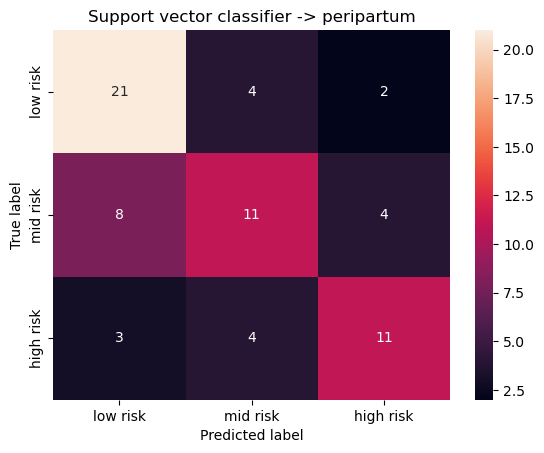

Accuracy:
0.5882352941176471
              precision    recall  f1-score   support

           0       0.54      0.93      0.68        27
           1       0.55      0.26      0.35        23
           2       0.82      0.50      0.62        18

    accuracy                           0.59        68
   macro avg       0.64      0.56      0.55        68
weighted avg       0.62      0.59      0.56        68

Confusion matrix:


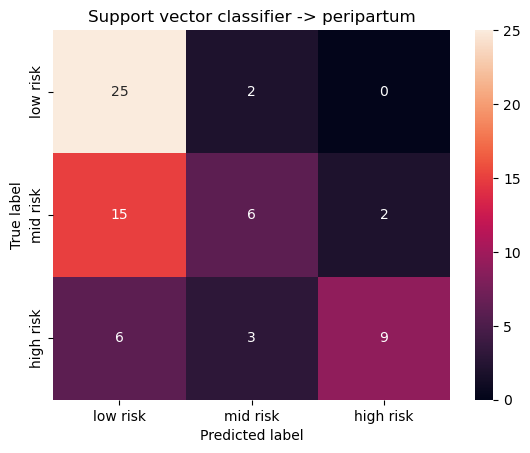

Accuracy:
0.6470588235294118
              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.58      0.48      0.52        23
           2       0.80      0.89      0.84        18

    accuracy                           0.65        68
   macro avg       0.66      0.67      0.66        68
weighted avg       0.64      0.65      0.64        68

Confusion matrix:


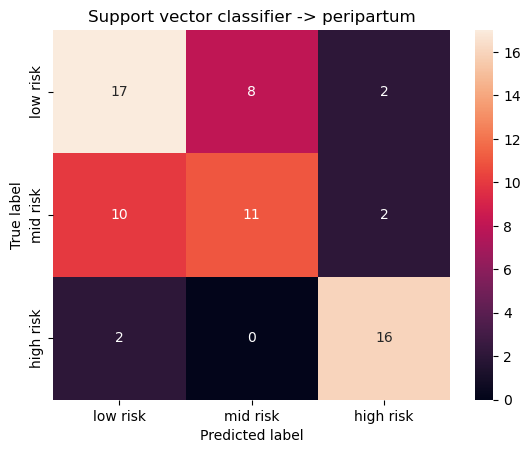

Accuracy:
0.7941176470588235
              precision    recall  f1-score   support

           0       0.81      0.78      0.79        27
           1       0.76      0.70      0.73        23
           2       0.81      0.94      0.87        18

    accuracy                           0.79        68
   macro avg       0.79      0.81      0.80        68
weighted avg       0.79      0.79      0.79        68

Confusion matrix:


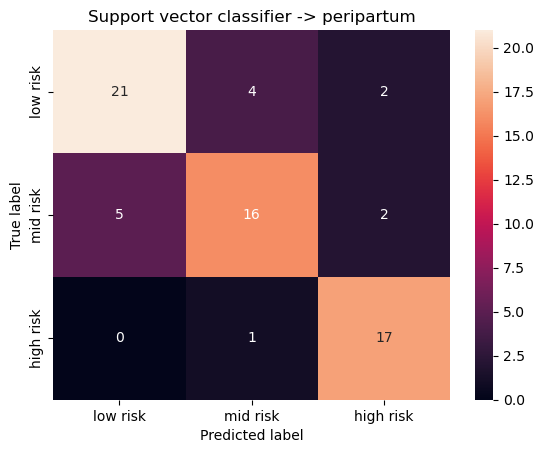

Accuracy:
0.7313432835820896
              precision    recall  f1-score   support

           0       0.66      0.85      0.74        27
           1       0.83      0.45      0.59        22
           2       0.80      0.89      0.84        18

    accuracy                           0.73        67
   macro avg       0.76      0.73      0.72        67
weighted avg       0.75      0.73      0.72        67

Confusion matrix:


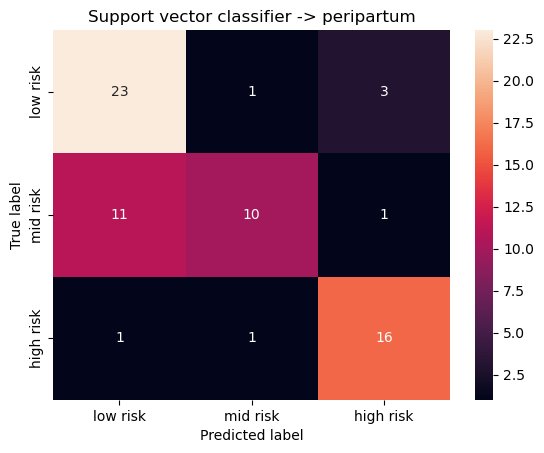

Accuracy:
0.6268656716417911
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        27
           1       0.45      0.23      0.30        22
           2       0.93      0.72      0.81        18

    accuracy                           0.63        67
   macro avg       0.65      0.61      0.60        67
weighted avg       0.63      0.63      0.60        67

Confusion matrix:


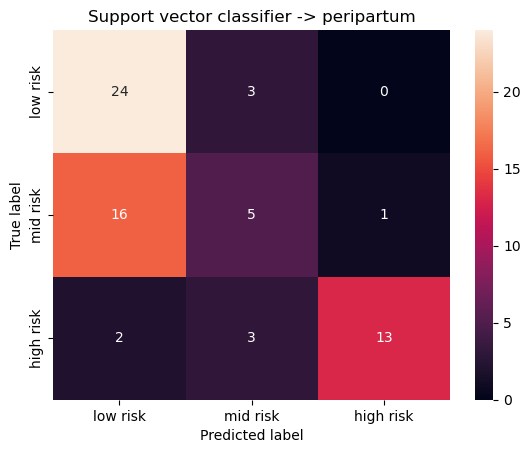

Accuracy:
0.6268656716417911
              precision    recall  f1-score   support

           0       0.61      0.70      0.66        27
           1       0.41      0.32      0.36        22
           2       0.84      0.89      0.86        18

    accuracy                           0.63        67
   macro avg       0.62      0.64      0.63        67
weighted avg       0.61      0.63      0.61        67

Confusion matrix:


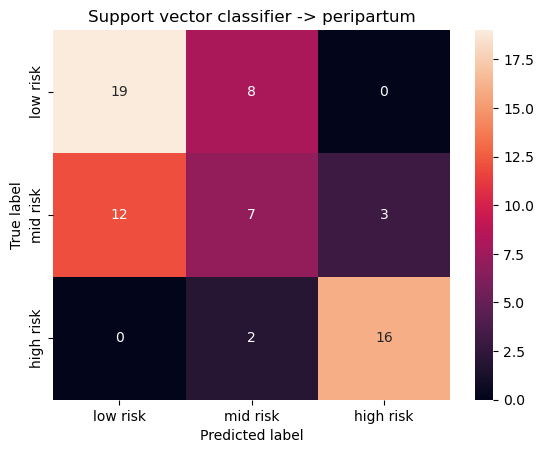

Accuracy:
0.6119402985074627
              precision    recall  f1-score   support

           0       0.59      0.70      0.64        27
           1       0.47      0.36      0.41        22
           2       0.78      0.78      0.78        18

    accuracy                           0.61        67
   macro avg       0.61      0.62      0.61        67
weighted avg       0.60      0.61      0.60        67

Confusion matrix:


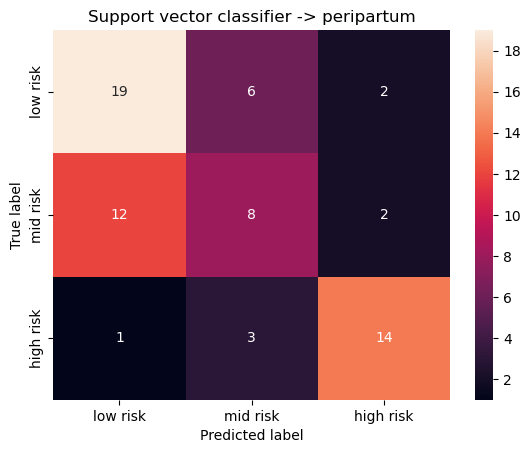

Accuracy:
0.6268656716417911
              precision    recall  f1-score   support

           0       0.62      0.78      0.69        27
           1       0.43      0.27      0.33        22
           2       0.79      0.83      0.81        18

    accuracy                           0.63        67
   macro avg       0.61      0.63      0.61        67
weighted avg       0.60      0.63      0.60        67

Confusion matrix:


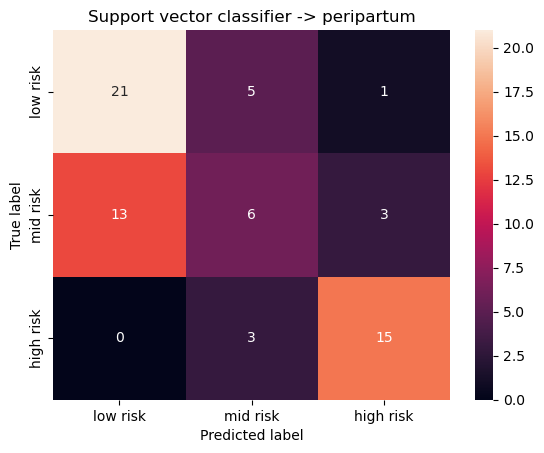

Accuracy:
0.8059701492537313
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        27
           1       0.85      0.77      0.81        22
           2       0.78      0.78      0.78        18

    accuracy                           0.81        67
   macro avg       0.81      0.80      0.80        67
weighted avg       0.81      0.81      0.81        67

Confusion matrix:


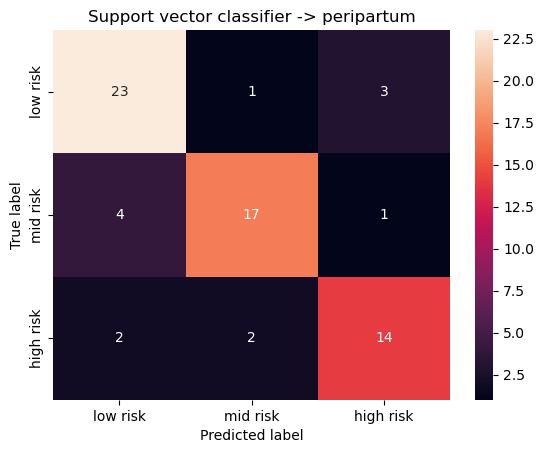

In [12]:
skf = StratifiedKFold(n_splits=15)
skf.get_n_splits(features, target)


for train_index, val_index in skf.split(features, target.astype("category")):
    X_train, X_val = features.iloc[train_index], features.iloc[val_index]
    y_train, y_val = target[train_index], target[val_index]
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    params = {"C": 50.0, "kernel": "rbf", "gamma": "scale"}
    model = SVC(**params).fit(X_train_scaled, y_train)
    model.fit(X_train_scaled, y_train)
    y_prob = model.predict(X_val_scaled)
    print("Accuracy:")
    print(metrics.accuracy_score(y_val, y_prob))
    print(metrics.classification_report(y_val, y_prob))
    print("Confusion matrix:")
    sns.heatmap(metrics.confusion_matrix(y_val, y_prob), annot=True, xticklabels=['low risk', 'mid risk', 'high risk'], yticklabels=['low risk', 'mid risk', 'high risk'])
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Support vector classifier -> peripartum")
    plt.show()

In [6]:
x = peripartum_df.drop(['RiskLevel'], axis=1)
y = peripartum_df['RiskLevel']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=5, stratify=y)

In [11]:
params = {"C": 50.0, "kernel": "rbf", "gamma": "scale"}
model = SVC(**params).fit(x_train, y_train)
model.fit(x_train,y_train)

SVC(C=50.0)

In [12]:
y_pred = model.predict(x_test)
print(f"Accuracy of SVM Classifier: {metrics.accuracy_score(y_test,y_pred)*100}")

Accuracy of SVM Classifier: 66.53543307086615
